In [1]:
#Arıza tespiti uygulamamda  Logistic Regression, Decision Tree, Random Forest, Support Vector Machine(SVM) kullandım.

In [2]:
# Gerekli Kütüphanelerin yüklenmesi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
# Veriyi yükleme
file_path = 'aa_train_test_230504_3w2.xlsx'
df = pd.read_excel(file_path, sheet_name='Sayfa1')

In [4]:
# İlk 5 satırı görüntüleme
print(df.head())

  Machine           Monitor                From                  To  \
0    M420  M420 Dişli Grubu 2023-03-17 00:00:00 2023-03-17 00:01:00   
1    M420  M420 Dişli Grubu 2023-03-17 00:01:00 2023-03-17 00:02:00   
2    M420  M420 Dişli Grubu 2023-03-17 00:02:00 2023-03-17 00:03:00   
3    M420  M420 Dişli Grubu 2023-03-17 00:03:00 2023-03-17 00:04:00   
4    M420  M420 Dişli Grubu 2023-03-17 00:04:00 2023-03-17 00:05:00   

   Total Acceleration Min ((m/s²)²)  Total Acceleration Max ((m/s²)²)  \
0                             10224                             10317   
1                             10227                             10287   
2                             10222                             10333   
3                             10249                             10348   
4                             10214                             10321   

   Total Acceleration Avg ((m/s²)²)  Horizontal Velocity Min (mm/s)  \
0                             10271                            

In [5]:
# Veri hakkında bilgi edinme
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30636 entries, 0 to 30635
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Machine                           30636 non-null  object        
 1   Monitor                           30636 non-null  object        
 2   From                              30636 non-null  datetime64[ns]
 3   To                                30636 non-null  datetime64[ns]
 4   Total Acceleration Min ((m/s²)²)  30636 non-null  int64         
 5   Total Acceleration Max ((m/s²)²)  30636 non-null  int64         
 6   Total Acceleration Avg ((m/s²)²)  30636 non-null  int64         
 7   Horizontal Velocity Min (mm/s)    30636 non-null  int64         
 8   Horizontal Velocity Max (mm/s)    30636 non-null  int64         
 9   Horizontal Velocity Avg (mm/s)    30636 non-null  int64         
 10  Axial Velocity Min (mm/s)         30636 non-nu

In [6]:
# Eksik veri kontrolü
print(df.isnull().sum())

Machine                             0
Monitor                             0
From                                0
To                                  0
Total Acceleration Min ((m/s²)²)    0
Total Acceleration Max ((m/s²)²)    0
Total Acceleration Avg ((m/s²)²)    0
Horizontal Velocity Min (mm/s)      0
Horizontal Velocity Max (mm/s)      0
Horizontal Velocity Avg (mm/s)      0
Axial Velocity Min (mm/s)           0
Axial Velocity Max (mm/s)           0
Axial Velocity Avg (mm/s)           0
Vertical Velocity Min (mm/s)        0
Vertical Velocity Max (mm/s)        0
Vertical Velocity Avg (mm/s)        0
Temperature Min (°C)                0
Temperature Max (°C)                0
Temperature Avg (°C)                0
Audio Min (dB)                      0
Audio Max (dB)                      0
Audio Avg (dB)                      0
Arıza                               0
dtype: int64


In [7]:
# Kategorik değişkenlerin sayısal değerlere dönüştürülmesi
df['Machine'] = df['Machine'].astype('category').cat.codes
df['Monitor'] = df['Monitor'].astype('category').cat.codes

In [8]:
# Hedef değişken ve özelliklerin belirlenmesi
X = df.drop(columns=['From', 'To', 'Arıza'])
y = df['Arıza']

In [9]:
# Eğitim ve test setlerine bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Veriyi standardize etme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
# Modelleri tanımlama
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

In [12]:
# Model eğitim ve hiperparametre optimizasyonu
best_models = {}
training_times = {}
for model_name, model in models.items():
    if model_name == 'Logistic Regression':
        param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
    elif model_name == 'Decision Tree':
        param_grid = {'max_depth': [None, 10, 20, 30, 40, 50],
                      'min_samples_split': [2, 5, 10]}
    elif model_name == 'Random Forest':
        param_grid = {'n_estimators': [100, 200, 300],
                      'max_depth': [None, 10, 20, 30],
                      'min_samples_split': [2, 5, 10]}
    elif model_name == 'Support Vector Machine':
        param_grid = {'C': [0.1, 1, 10, 100],
                      'gamma': [1, 0.1, 0.01, 0.001]}
    
    start_time = time.time()
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
    grid_search.fit(X_train, y_train)
    end_time = time.time()
    
    training_time = end_time - start_time
    training_times[model_name] = training_time
    best_models[model_name] = grid_search.best_estimator_

Evaluating Logistic Regression
Training time for Logistic Regression: 3.64 seconds
              precision    recall  f1-score   support

           0       0.81      0.91      0.86      6626
           1       0.66      0.45      0.54      2565

    accuracy                           0.78      9191
   macro avg       0.73      0.68      0.70      9191
weighted avg       0.77      0.78      0.77      9191



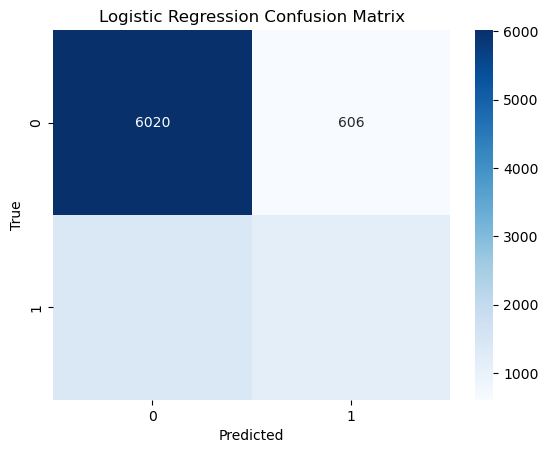

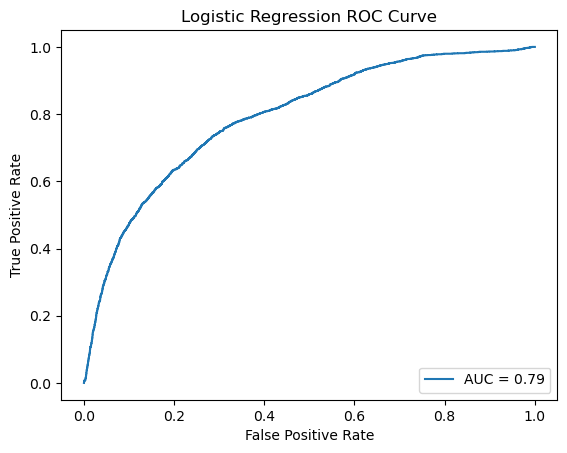

Evaluating Decision Tree
Training time for Decision Tree: 14.76 seconds
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      6626
           1       0.83      0.82      0.82      2565

    accuracy                           0.90      9191
   macro avg       0.88      0.87      0.88      9191
weighted avg       0.90      0.90      0.90      9191



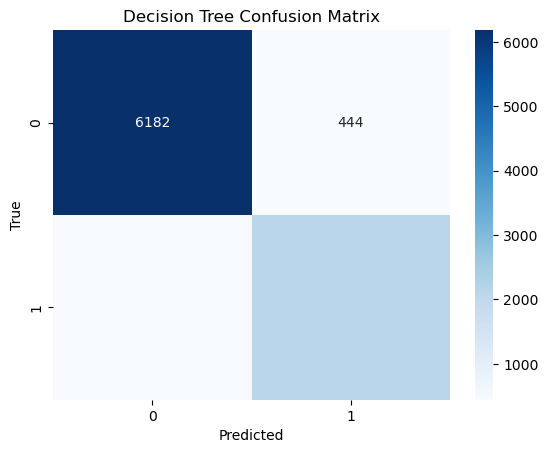

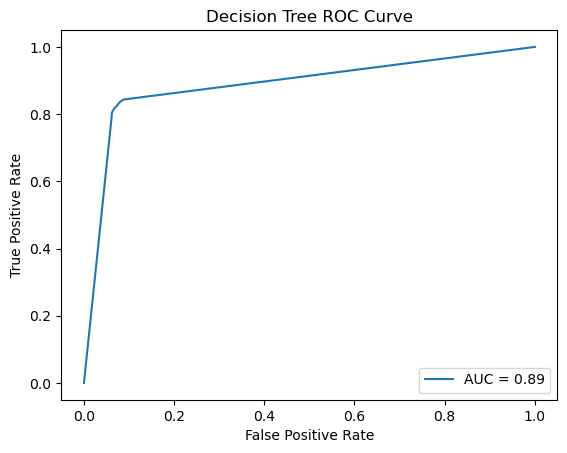

Evaluating Random Forest
Training time for Random Forest: 1267.84 seconds
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      6626
           1       0.92      0.89      0.91      2565

    accuracy                           0.95      9191
   macro avg       0.94      0.93      0.94      9191
weighted avg       0.95      0.95      0.95      9191



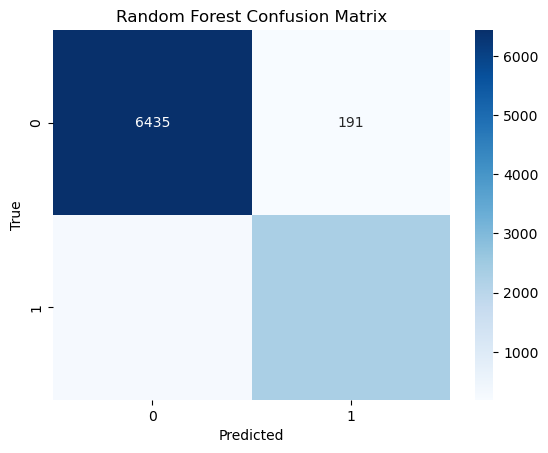

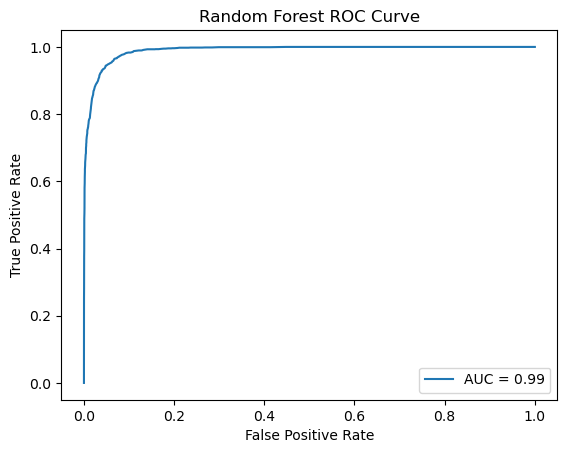

Evaluating Support Vector Machine
Training time for Support Vector Machine: 3961.31 seconds
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6626
           1       0.88      0.89      0.89      2565

    accuracy                           0.94      9191
   macro avg       0.92      0.92      0.92      9191
weighted avg       0.94      0.94      0.94      9191



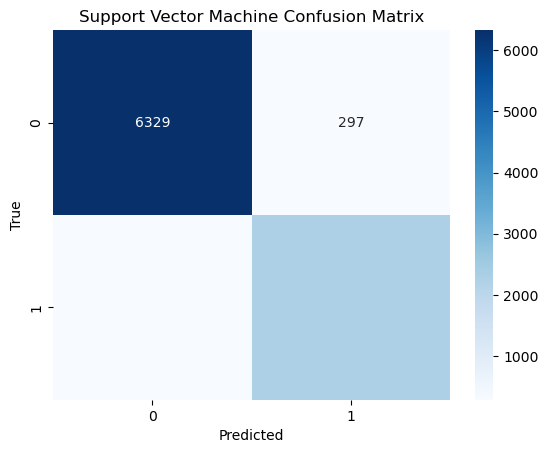

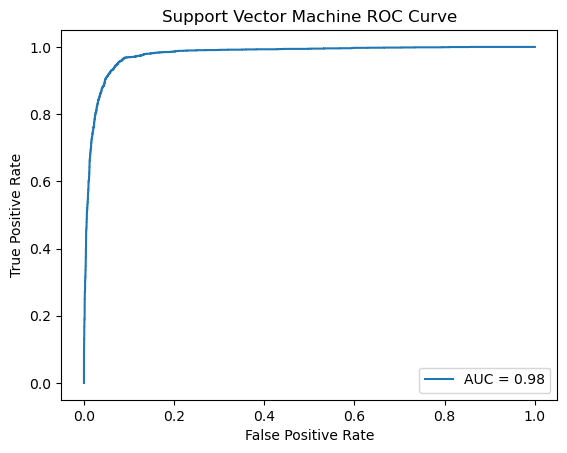

In [13]:
# Model değerlendirme
for model_name, model in best_models.items():
    print(f"Evaluating {model_name}")
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    print(f"Training time for {model_name}: {training_times[model_name]:.2f} seconds")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()